Analysis
1. The plot indicates that urban cities have more driver then suburban and rural cities, while urban have lowest average fare among three city types.

2. Although demand in suburban area is higher than urban area, rural cities holds the highest demand for new driver.

3. Urban have the lowest average fare while have highest rides. It's may indicate a strong correlation between fare and rides.


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)
df_rides = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
data = pd.merge(df_rides, df_city, on='city', how='left')
# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
data.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [3]:
city_urban = data[data['type'] == 'Urban']
city_rural = data[data['type'] == 'Rural']
city_suburban = data[data['type'] == 'Suburban']
urban = city_urban.groupby([data['city']])
rural = city_rural.groupby([data['city']])
suburban = city_suburban.groupby([data['city']])



## Bubble Plot of Ride Sharing Data

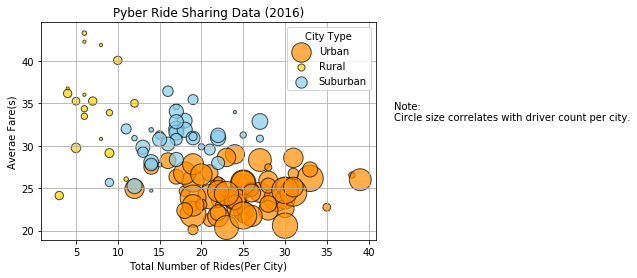

In [4]:
# Obtain the x and y coordinates for each of the three city types
urban_x = urban['ride_id'].count()
urban_y = urban['fare'].mean()
urban_z = urban['driver_count'].mean()

rural_x = rural['ride_id'].count()
rural_y = rural['fare'].mean()
rural_z = rural['driver_count'].mean()

suburban_x = suburban['ride_id'].count()
suburban_y = suburban['fare'].mean()
suburban_z = suburban['driver_count'].mean()
# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, s=urban_z * 10, label='Urban', color='darkorange', edgecolor='k', alpha=0.7, marker='o') 
plt.scatter(rural_x, rural_y, s=rural_z * 10, label='Rural', color='gold', edgecolor='k', alpha=0.7, marker='o')
plt.scatter(suburban_x, suburban_y, s=suburban_z * 10, label='Suburban', color='skyblue', edgecolor='k', alpha=0.7, marker='o')
# Incorporate the other graph properties
plt.grid()
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Averae Fare(s)')
plt.title("Pyber Ride Sharing Data (2016)")
# Create a legend
legend = plt.legend(title='City Type', loc='best')
# Incorporate a text label regarding circle size
plt.text(43,33, 'Note: \nCircle size correlates with driver count per city.')
# Save Figure
plt.savefig('byber.png')
plt.show()

## Total Fares by City Type

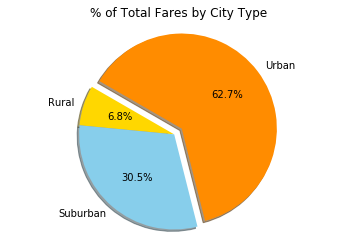

In [8]:
# Calculate Type Percents
df_type = data.groupby(['type'])
df_fare_sum = df_type['fare'].sum()
# Build Pie Chart
labels = ['Rural','Suburban','Urban']
colors = ['gold', 'skyblue', 'darkorange']
explodes = (0, 0, 0.1)
plt.pie(df_fare_sum,explode=explodes, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150 )
plt.title('% of Total Fares by City Type')
plt.axis('equal')
# Save Figure
plt.savefig('TotalDriversbyCityType.png')
plt.show()

## Total Rides by City Type

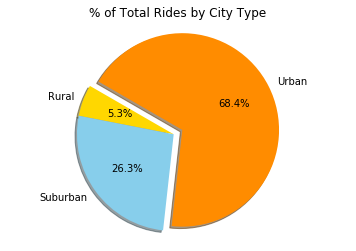

In [9]:
# Calculate Ride Percents
df_ride_count = df_type['ride_id'].count()
# Build Pie Chart
labels = ['Rural','Suburban','Urban']
colors = ['gold', 'skyblue', 'darkorange']
explodes = (0, 0, 0.1)
plt.pie(df_ride_count,explode=explodes, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150 )
plt.title('% of Total Rides by City Type')
plt.axis('equal')
# Save Figure
plt.savefig('TotalRidesbyCityType.png')
plt.show()

## Total Drivers by City Type

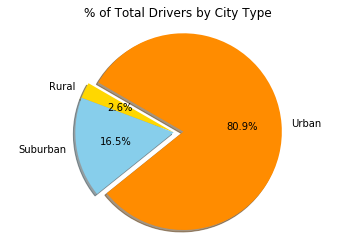

In [10]:
# Calculate Driver Percents
df_city_driver_type = df_city.groupby(['type'])
total_driver = df_city_driver_type['driver_count'].sum()
# Build Pie Charts
labels = ['Rural','Suburban','Urban']
colors = ['gold', 'skyblue', 'darkorange']
explodes = (0, 0, 0.1)
plt.pie(total_driver,explode=explodes, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150 )
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
# Save Figure
plt.savefig('TotalDriversbyCityType.png')
plt.show()